In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gapminder-datacamp-2007/gapminder_full.csv
/kaggle/input/gapminder-datacamp-2007/gapminder - gapminder.csv


# GDP per Capita vs Life Expectancy in 2007

In [2]:
# reading the file
gapminder = pd.read_csv("/kaggle/input/gapminder-datacamp-2007/gapminder_full.csv")

gapminder.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [3]:
# select only data 2007
gapminder = gapminder[gapminder["year"] == 2007]

gapminder.head()

,country,year,population,continent,life_exp,gdp_cap
11,Afghanistan,2007,31889923,Asia,43.828,974.580338
23,Albania,2007,3600523,Europe,76.423,5937.029526
35,Algeria,2007,33333216,Africa,72.301,6223.367465
47,Angola,2007,12420476,Africa,42.731,4797.231267
59,Argentina,2007,40301927,Americas,75.320,12779.379640


In [4]:
gapminder.to_csv("gapminder_2007.csv")

### Formulate the problem
Does GDP per capita countries have a positive correlation with life expectancy?

In [5]:
# view unique continent
print(np.unique(gapminder.iloc[:, 3]))

['Africa' 'Americas' 'Asia' 'Europe' 'Oceania']


In [6]:
# adding color column based on continent
gapminder['color'] = gapminder['continent'].map({'Asia': 'red', 
                                                 'Europe': 'blue', 
                                                 'Africa': 'green', 
                                                 'Americas': 'yellow', 
                                                 'Oceania': 'black'})

gapminder.head()

,country,year,population,continent,life_exp,gdp_cap,color
11,Afghanistan,2007,31889923,Asia,43.828,974.580338,red
23,Albania,2007,3600523,Europe,76.423,5937.029526,blue
35,Algeria,2007,33333216,Africa,72.301,6223.367465,green
47,Angola,2007,12420476,Africa,42.731,4797.231267,green
59,Argentina,2007,40301927,Americas,75.320,12779.379640,yellow


In [7]:
# country of the highest population
highest = np.max(gapminder.iloc[:, 2])
country_highest = gapminder.loc[gapminder["population"] == highest, "country"]
gdp_highest = gapminder.loc[gapminder["population"] == highest, "gdp_cap"]
life_highest = gapminder.loc[gapminder["population"] == highest, "life_exp"]
print("Highest size population country:")
print(country_highest)
print(gdp_highest)
print(life_highest)

Highest size population country:
299    China
Name: country, dtype: object
299    4959.114854
Name: gdp_cap, dtype: float64
299    72.961
Name: life_exp, dtype: float64


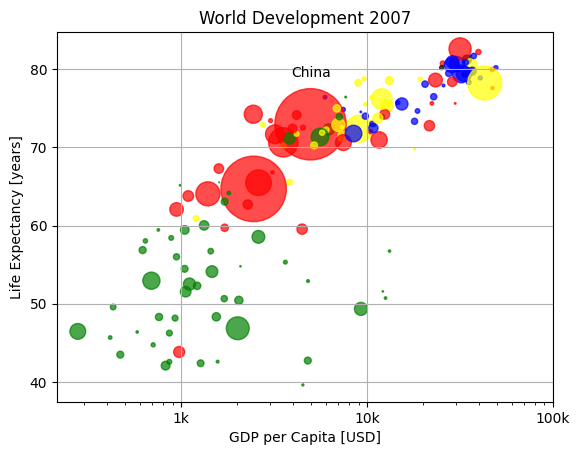

In [8]:
# Data Visualization

# correlation two data
x = gapminder.iloc[:, 5] # gdp_cap
y = gapminder.iloc[:, 4] # life_exp

# color bubble chart
color = gapminder.iloc[:, -1] # color by continent

# create bubble size based on population size
size = gapminder.iloc[:, 2] / 500000

# opacity of bubble
alpha = 0.7

plt.scatter(x, y, c=color, s=size, alpha=alpha)

# scale to logarithmic
plt.xscale("log")

# adding story
plt.xlabel("GDP per Capita [USD]")
plt.ylabel("Life Expectancy [years]")
plt.title("World Development 2007")
plt.xticks([1000, 10000, 100000], ["1k", "10k", "100k"])

plt.grid(True)

# adding some text
plt.text(3900, 79, "China")

plt.show()

### Summary

1. Countries with a greater GDP per person generally experience longer life expectancies.

2. Countries in Africa typically exhibit lower GDP per capita and shorter life expectancies.

3. China has the largest population among all countries.
